In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3, Xception, VGG16, VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import os
import random
import numpy as np
from keras.models import Sequential
import urllib
import cv2
import imageio as io
import PIL
import pathlib

MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow solo!
    "resnet": ResNet50
  }


In [17]:
train_ds1 = tf.keras.utils.image_dataset_from_directory(r"c:\\EIG\\Ejercicios\\CarneDataset\\train",validation_split=0.2,subset="training",seed=123,image_size=(300,300))

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [ ]:
import tensorflow as tf
test_ds1 = tf.keras.utils.image_dataset_from_directory(r"c:\\EIG\\Ejercicios\\CarneDataset\\test",validation_split=0.2,subset="testing",seed=123,image_size=(300,300))

In [18]:
class_names = train_ds1.class_names
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


In [20]:
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


In [21]:
class_names_train = train_ds1.class_names
print(class_names_train)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


<function matplotlib.pyplot.show(close=None, block=None)>

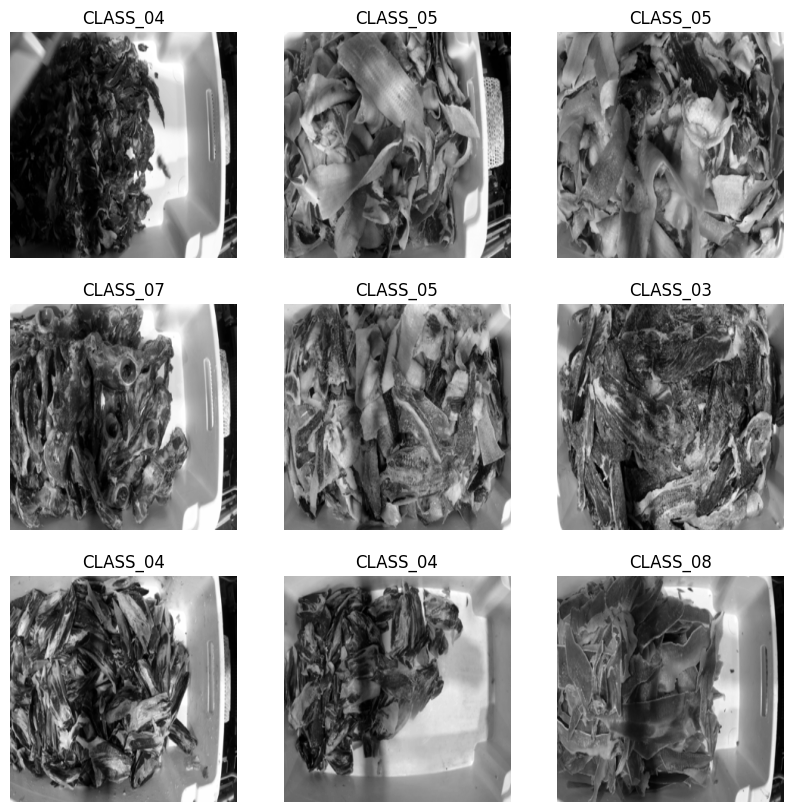

In [45]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds1.take(1):
 for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img_bgr = cv2.cvtColor(images[i].numpy().astype("uint8"), cv2.COLOR_RGB2BGR)   #Imagenes a color COLOR_RGB2BGR tambien probe este color COLOR_BGR2HSV
    img_gris = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2GRAY)   #Imagenes en Gris COLOR_RGB2GRAY
    plt.imshow(img_gris, cmap="gray") 
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show

In [22]:
#CREACION Y ENTRENAMIENTO MODELO CNN

from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.convolutional.conv2d_transpose import Conv2D
num_clases=len(class_names)

modelo=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255,input_shape=(300,300,3)),
    tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_clases)
])

In [23]:
#UTILIZANDO EL MODELO ADAM
modelo.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [25]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [27]:
epochs=10
history = modelo.fit(
    train_ds1,
    epochs=epochs
) 

Epoch 1/10
41/41 [==============================] - 66s 2s/step - loss: 1.5008 - accuracy: 0.5815
Epoch 2/10
41/41 [==============================] - 70s 2s/step - loss: 0.5594 - accuracy: 0.8110
Epoch 3/10
41/41 [==============================] - 72s 2s/step - loss: 0.4254 - accuracy: 0.8439
Epoch 4/10
41/41 [==============================] - 73s 2s/step - loss: 0.2254 - accuracy: 0.9281
Epoch 5/10
41/41 [==============================] - 72s 2s/step - loss: 0.1154 - accuracy: 0.9671
Epoch 6/10
41/41 [==============================] - 72s 2s/step - loss: 0.1133 - accuracy: 0.9648
Epoch 7/10
41/41 [==============================] - 73s 2s/step - loss: 0.0239 - accuracy: 0.9962
Epoch 8/10
41/41 [==============================] - 72s 2s/step - loss: 0.0160 - accuracy: 0.9954
Epoch 9/10
41/41 [==============================] - 73s 2s/step - loss: 0.0072 - accuracy: 0.9985
Epoch 10/10
41/41 [==============================] - 73s 2s/step - loss: 0.0023 - accuracy: 1.0000


In [32]:
#Grabar modelo en Disco
modelo.save("c:\\EIG\\Ejercicios\\CarneDataset\\modelo_CNN.h5")

In [33]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    'c:\\EIG\\Ejercicios\\CarneDataset\\test',
    seed=123,
    image_size=(300,300)
)

Found 810 files belonging to 8 classes.


In [35]:
#evaluar el modelo del conjunto train
modelo.evaluate(train_ds1, return_dict=True)

41/41 [==============================] - 21s 495ms/step - loss: 0.0011 - accuracy: 1.0000


{'loss': 0.0010973162716254592, 'accuracy': 1.0}

In [36]:
#evaluar el modelo del conjunto test
modelo.evaluate(test_ds, return_dict=True)

26/26 [==============================] - 15s 547ms/step - loss: 0.4757 - accuracy: 0.8988


{'loss': 0.4756753146648407, 'accuracy': 0.8987654447555542}

In [39]:
import numpy as np
#evaluacion de una imagen prueba
image_path = 'c:\\EIG\\Ejercicios\\CarneDataset\\test\\Gato.png'
image = tf.keras.preprocessing.image.load_img(image_path).resize((300, 300))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = modelo.predict(input_arr)

1/1 [==============================] - 0s 133ms/step


In [50]:
#tomar cualquier imagen del set de pruebas para ver su prediccion
score = tf.nn.softmax(predictions[0])
print(
    "esta imagen pertenece a la {} con un {: .2f}  % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
     

esta imagen pertenece a la CLASS_07 con un  84.32  % de exactitud.


In [51]:
#Grabar modelo en Disco
modelo.save("c:\\EIG\\Ejercicios\\CarneDataset\\modelo_CNN2.h5")

In [53]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 7.5/7.5 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 10.7/10.7 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 15.0/15.0 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.5/2.5 MB 5.0 MB/s eta 0:00:00
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     -------------------------------------- 470.4/470.4 kB 3.3 MB/s eta 0:00:00
     ---


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Found 810 images belonging to 8 classes.


C:\Users\pjc\AppData\Local\Temp\ipykernel_3872\4263726416.py:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision a

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.9444    0.3542    0.5152        48
           2     0.7788    0.8351    0.8060        97
           3     0.5915    0.9333    0.7241        45
           4     0.9581    0.9455    0.9518       459
           5     1.0000    0.7895    0.8824        19
           6     0.7634    0.8772    0.8163       114
           7     0.7778    0.5185    0.6222        27

    accuracy                         0.8679       810
   macro avg     0.7268    0.6567    0.6647       810
weighted avg     0.8818    0.8679    0.8629       810



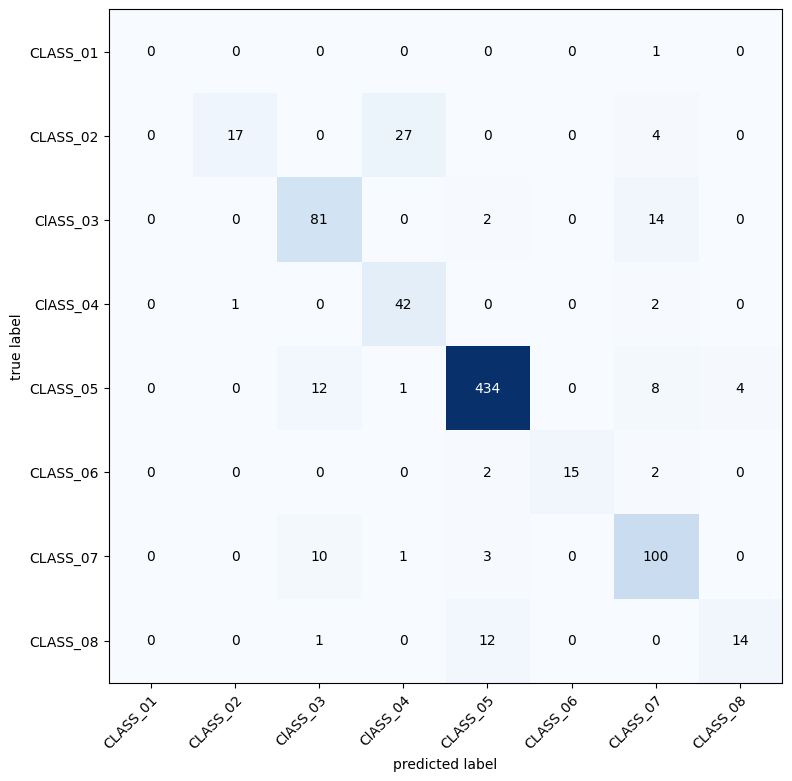

In [3]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score,roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

width_shape = 300
height_shape = 300

names = ['CLASS_01', 'CLASS_02', 'ClASS_03','ClASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']

test_data_dir = 'c:\\EIG\\Ejercicios\\CarneDataset\\test'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (width_shape, height_shape),
    class_mode='categorical',
    shuffle = False)

custom_Model = load_model("C:\\EIG\\Ejercicios\\CarneDataset\modelo_CNN2.h5")

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc = confusion_matrix(y_real, y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()
print(metrics.classification_report(y_real, y_pred, digits = 4))